In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
DATA = '../data'

In [3]:
adult_census = pd.read_csv(f'{DATA}/census1994.csv')
adult_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,=50K


In [4]:
adult_census.income = adult_census.income.map(
    {'=50K': '<=50K', '50K': '>50K'})

In [5]:
adult_census.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
adult_census.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [7]:
target_col = 'income'
numerics = [
    'age', 'education_num', 'capital_gain', 'capital_loss',
    'hours_per_week']
categoricals = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country']
all_cols = numerics + categoricals + [target_col]
df = adult_census[all_cols]
df.shape

(32561, 14)

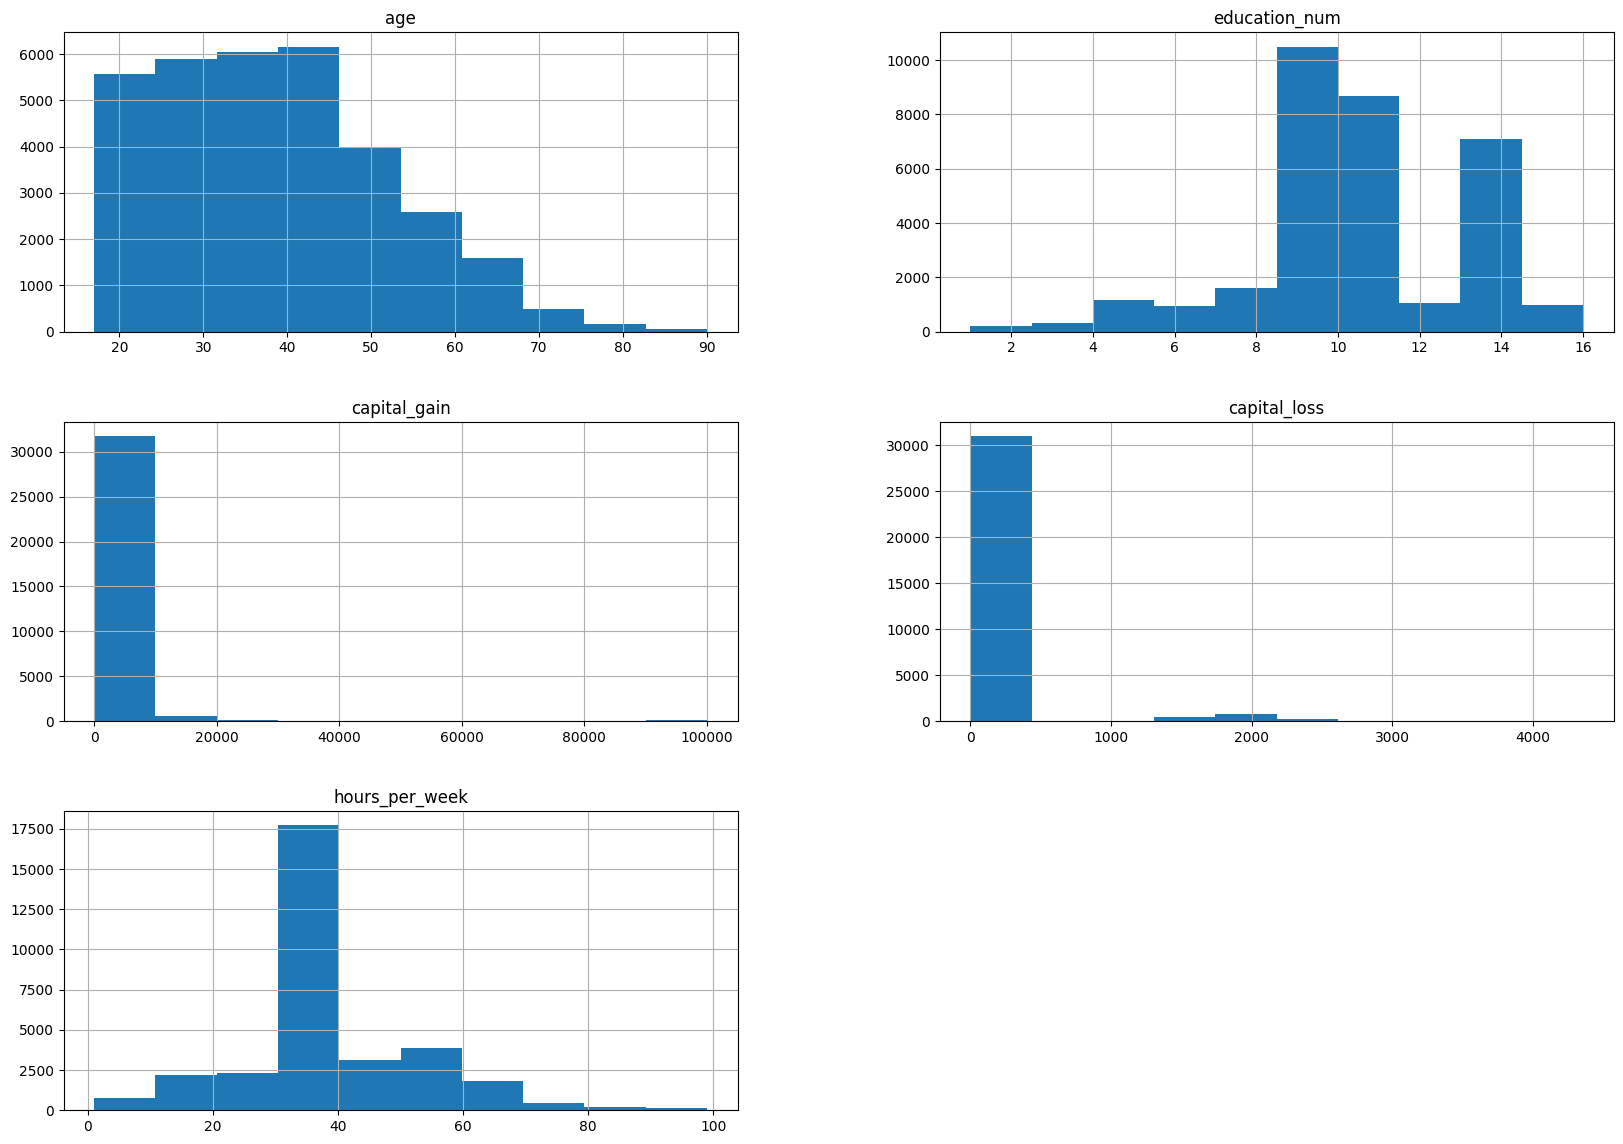

In [8]:
df.hist(figsize=(20, 14));

In [9]:
df.sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [10]:
df.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [11]:
pd.crosstab(index=df.education, columns=df.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


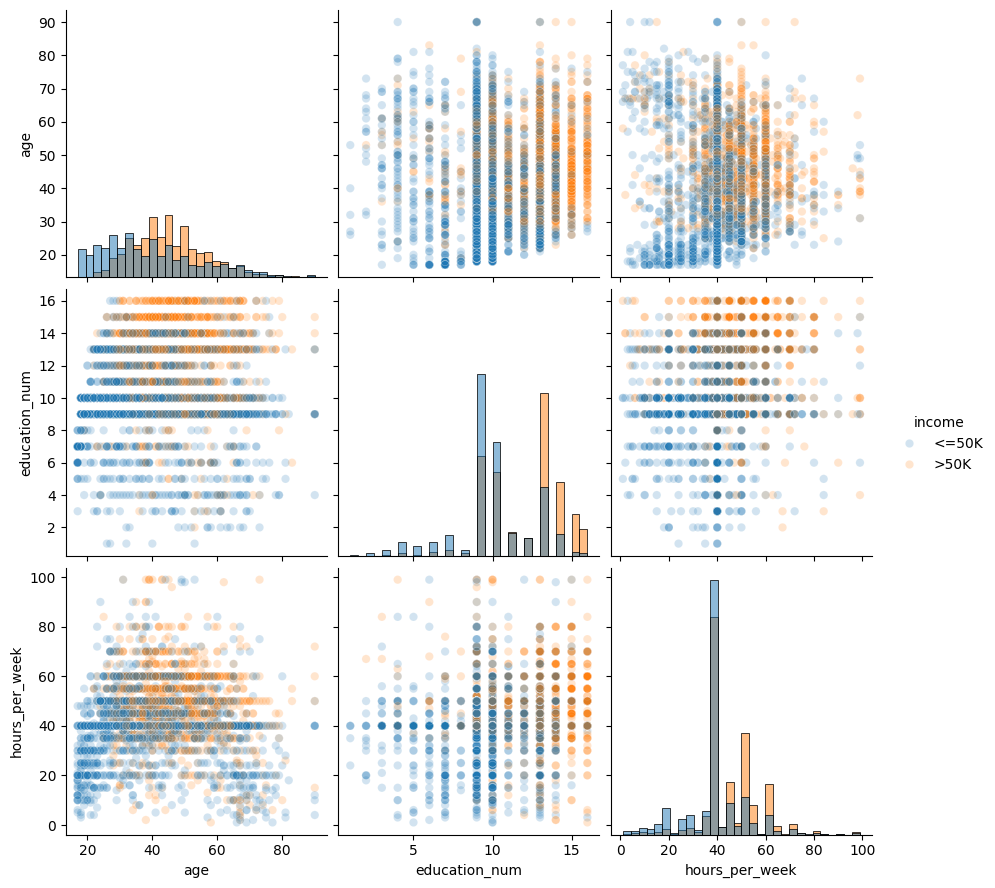

In [12]:
N_SAMPLE = 5000
cols = ['age', 'education_num', 'hours_per_week']
sns.pairplot(
    data=df[:N_SAMPLE],
    vars=cols,
    hue=target_col,
    plot_kws={'alpha': 0.2},
    height=3,
    diag_kind='hist',
    diag_kws={'bins': 30});

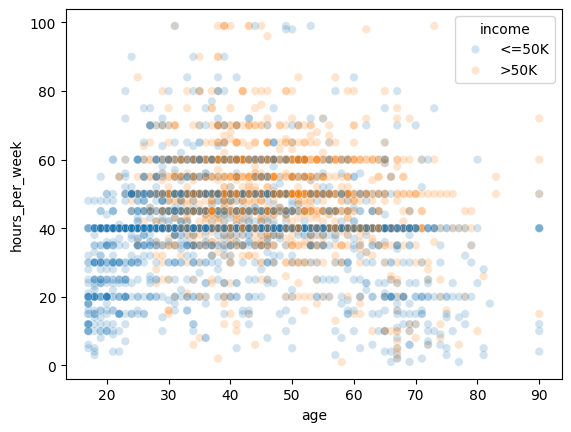

In [16]:
sns.scatterplot(
    x='age',
    y='hours_per_week',
    data=df[:N_SAMPLE],
    hue=target_col,
    alpha=0.2);

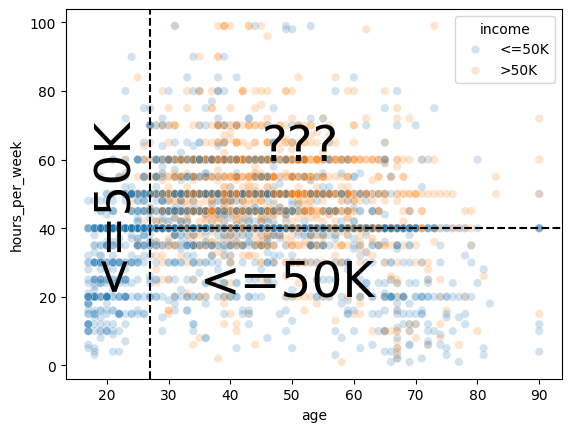

In [18]:
ax = sns.scatterplot(
    x='age',
    y='hours_per_week',
    data=df[:N_SAMPLE],
    hue=target_col,
    alpha=0.2)
AGE_LIMIT = 27
plt.axvline(x=AGE_LIMIT, ymin=0, ymax=1, color='k', linestyle='--')
HRS_LIMIT = 40
plt.axhline(y=HRS_LIMIT, xmin=0.18, xmax=1, color='k', linestyle='--')
plt.annotate('<=50K', (17, 25), rotation=90, fontsize=35)
plt.annotate('<=50K', (35, 20), fontsize=35)
plt.annotate('???', (45, 60), fontsize=35);